In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Data Preprocessing - Assignment II</b></font> 

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from bubble_plot.utils import describe_categorical_values
from scipy import stats

For this exercise, please download `train.csv` from the following dataset: [Housing prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

Also, look at the dictionary `data_description.txt` in the same link.

# Exercise:

#### Load the dataset into a pandas DataFrame.



In [3]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

## Missing Values:
### 1. Which columns have missing values? 

In [5]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

These 19 columns contains Nulls:

In [6]:
df_null = assess_NA(df)
df_null.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [7]:
len(df_null)

19

#### How many missing values are there (per column)?

answer: a lot, let's look at `df_null`

In [8]:
df_null

,Number of NA,Percent NA
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


### 2. Choose 10 insteresting columns from the previous clause. 

Let's see what is important for hous retail:

In [9]:
chosen_ten = ['PoolQC', 'Alley',  'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageYrBlt','BsmtFinType2', 'BsmtFinType1','MasVnrType', ]

#### Per column, deal with the missing values (drop or imputate).

In [10]:
chosen_df = df[chosen_ten]
chosen_df_Nan_count = assess_NA(chosen_df)
chosen_df_Nan_count

,Number of NA,Percent NA
PoolQC,1453,99.52
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageType,81,5.55
BsmtFinType2,38,2.60
BsmtFinType1,37,2.53
MasVnrType,8,0.55


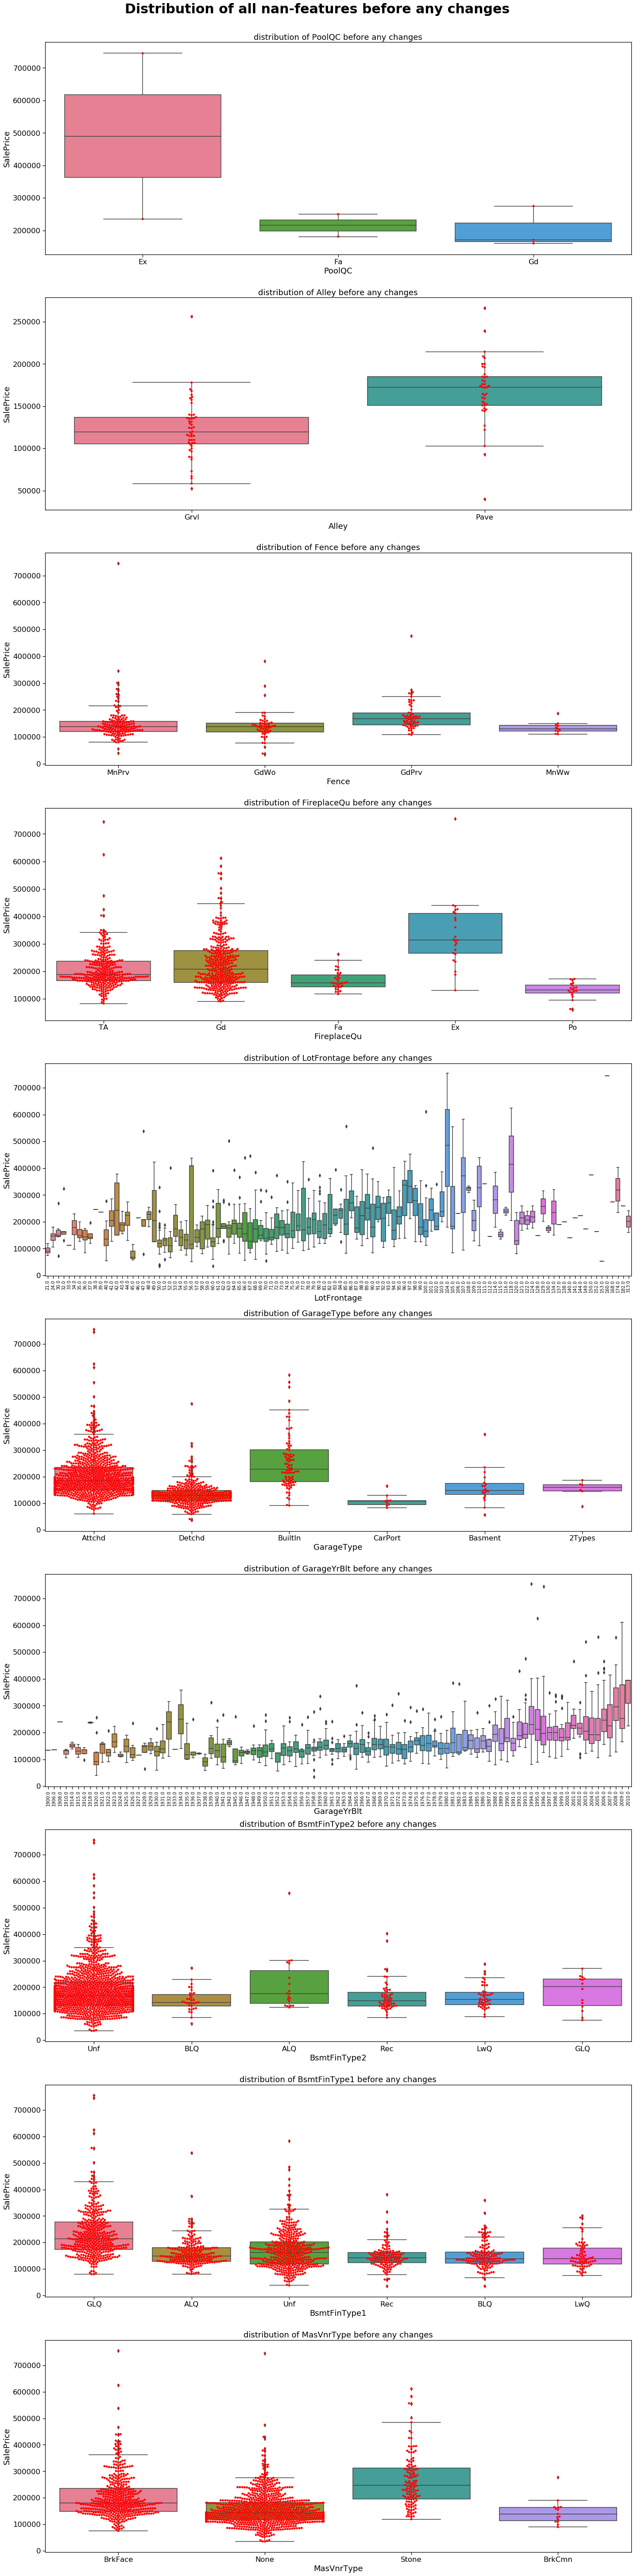

In [11]:
fig, ax = plt.subplots(10, 1, figsize=(20, 80))
fig.suptitle("Distribution of all nan-features before any changes",
             fontsize=30, fontweight='bold', y=1.01)
for var, subplot in zip(chosen_ten, ax.flatten()):
    if var == 'GarageYrBlt'or var =='LotFrontage':
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90, fontsize=10)
    g = sns.boxplot(x=var, y='SalePrice',data=df,palette='husl',ax=subplot)
    if var != 'GarageYrBlt' and var !='LotFrontage':
        g2 = sns.swarmplot(x=var, y='SalePrice', data=df, color="red",ax=subplot)

    g.set(title='distribution of {} before any changes'.format(var))
    fig.tight_layout()

In [12]:
df.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [13]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

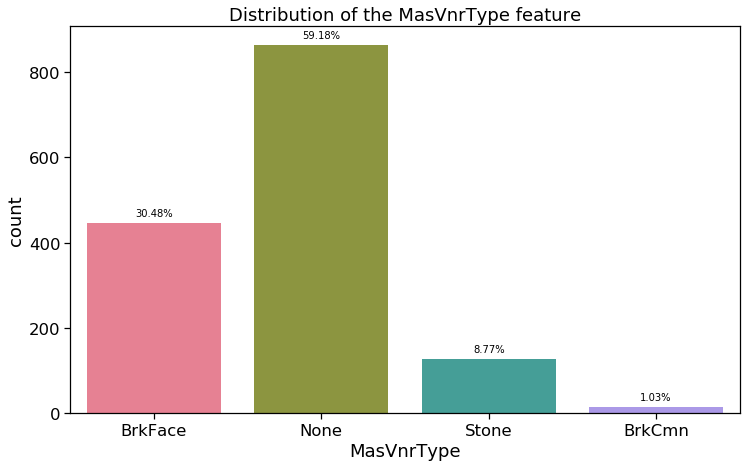

In [14]:
fig,ax = plt.subplots(figsize=(12,5))
sns.countplot(x=df.MasVnrType,data=df ,palette='husl')
ax.set_title('Distribution of the MasVnrType feature')
for p in ax.patches:
    ax.annotate('{}%'.format(round(p.get_height()/len(chosen_df.MasVnrType)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center', \
                       va = 'center',xytext = (0, 10),textcoords = 'offset points',size = 10)
fig.subplots_adjust(top=1.2)
plt.show()

Feature MasVnrType: Masonry veneer type contains 8 Nan values. It means we can inplace Nan with `None` category
because it looks like hand mistake, `None` and `nan` looks similar, so we can input the most common value `None`

In [15]:
df.MasVnrType.fillna('None',inplace=True)

In [16]:
df.MasVnrType.isna().sum()

0

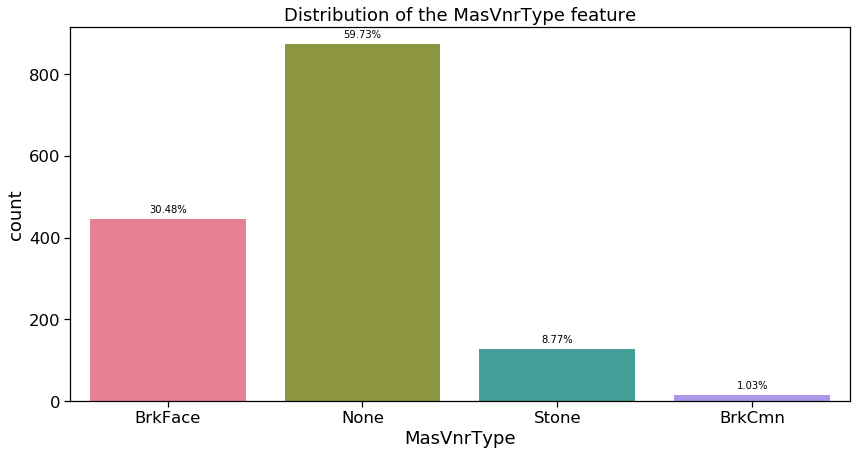

In [17]:
fig,(ax) = plt.subplots(figsize=(12,5))
sns.countplot(x=df.MasVnrType,data=df ,palette='husl')
ax.set_title('Distribution of the MasVnrType feature')
plt.tight_layout()
for p in ax.patches:
    ax.annotate('{}%'.format(round(p.get_height()/len(chosen_df.MasVnrType)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center', \
                       va = 'center',xytext = (0, 10),textcoords = 'offset points',size = 10)
fig.subplots_adjust(top=1.2)
plt.show()

Great! For 1 nan-feature less now and percentage of `None` category became higher

Next to `LotFrontage`: Linear feet of street connected to property counts 259 Nan values. It's almost 17% of all values in this feature. Let's see how it correlated with price:

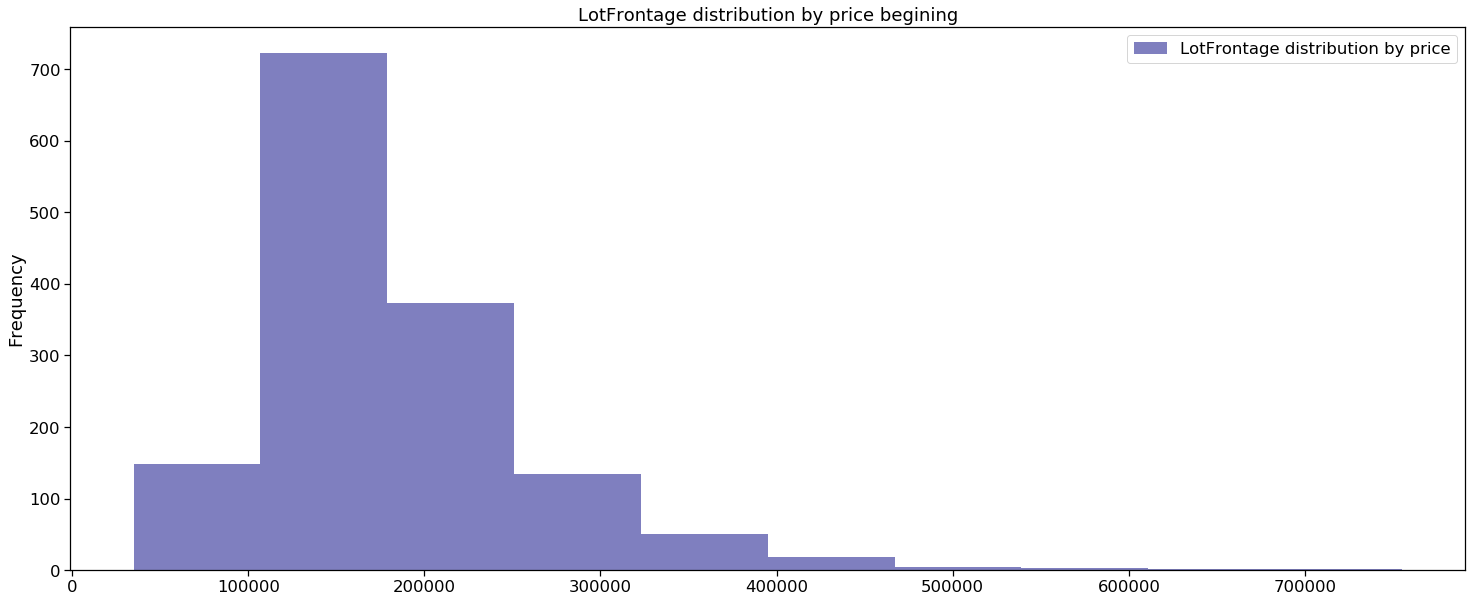

In [18]:
df.plot(x='LotFrontage',y='SalePrice',kind='hist', alpha=0.5,
        label='LotFrontage distribution by price',title='LotFrontage distribution by price begining', 
        figsize=(25,10), cmap=plt.get_cmap('jet'))

In [19]:
chosen_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Can you imagine a house without road? Maybe in woods or mountains - yes, but not in the city. And even there it will have connection with the closest road. We will assume that all houses have some street connected with them and will fill `Nan` value with `mean`.

In [20]:
df.LotFrontage.fillna(df.LotFrontage.mean(),inplace=True)

In [21]:
df.LotFrontage.isna().sum()

0

Our check for `nan` shows that there no more `nan` value in `Lot Frontage` feature and imputing didn't affect the distribution of the feature

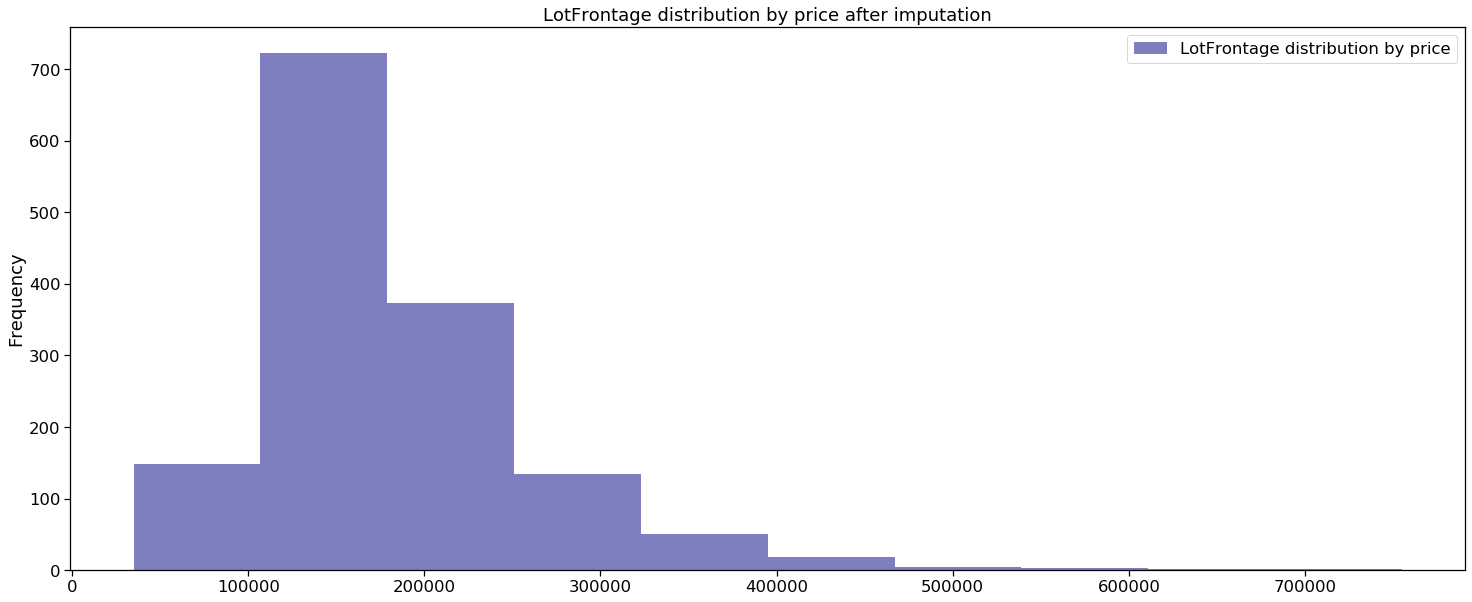

In [22]:
df.plot(x='LotFrontage',y='SalePrice',kind='hist', alpha=0.5,
        label='LotFrontage distribution by price',title='LotFrontage distribution by price after imputation', 
        figsize=(25,10),  cmap=plt.get_cmap('jet'))

 <div class="alert alert-info">Explain you business logic behind each step you take per column.
</div> 

Let's check the features datatype

In [23]:
chosen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PoolQC        7 non-null      object 
 1   Alley         91 non-null     object 
 2   Fence         281 non-null    object 
 3   FireplaceQu   770 non-null    object 
 4   LotFrontage   1201 non-null   float64
 5   GarageType    1379 non-null   object 
 6   GarageYrBlt   1379 non-null   float64
 7   BsmtFinType2  1422 non-null   object 
 8   BsmtFinType1  1423 non-null   object 
 9   MasVnrType    1452 non-null   object 
dtypes: float64(2), object(8)
memory usage: 114.2+ KB


`PoolQC`,`Alley`, `Fence`, `FireplaceQu`, `GarageType`,`BsmtFinType2`, `BsmtFinType2`, `GarageYrBlt` : all Nans in these columns saying only about one thing: no such position in this house(no pool/no alley/ no fance etc.). 

And `GarageYrBlt` == `nan` tells us: there wasn't buid any garage. 

To not affect the data we should  or fill `Nan` value with `max_value` (assume that the basement is building just in the moment of data collection) or we can drop 81 rows(but i guessing it will affect our model well). 

So, dicided: to fill `GarageYrBlt` with `maximum` and the rest of features with words `not existent`

In [24]:
df.GarageYrBlt.fillna(df.GarageYrBlt.max(), inplace=True)

In [25]:
new_val ={'PoolQC':'not existent', 'Alley':'not existent', 'Fence':'not existent', 
                     'FireplaceQu':'not existent', 'GarageType':'not existent', 'BsmtFinType1':'not existent',
                   'BsmtFinType2':'not existent'}
df.fillna(new_val, inplace=True)

In [26]:
chosen_df2 = df[chosen_ten]
chosen_df_Nan_count2 = assess_NA(chosen_df2)
chosen_df_Nan_count2

,Number of NA,Percent NA


No any Nans in our data set

### 3. What is the data shape now? 

In [27]:
df.shape

(1460, 81)

The shape is the same as it was in the begining

#### If you dropped rows - did you decrease the number of rows significantly?
 

We didn't drop any row

### 4. Plot the distribution of your imputated features.

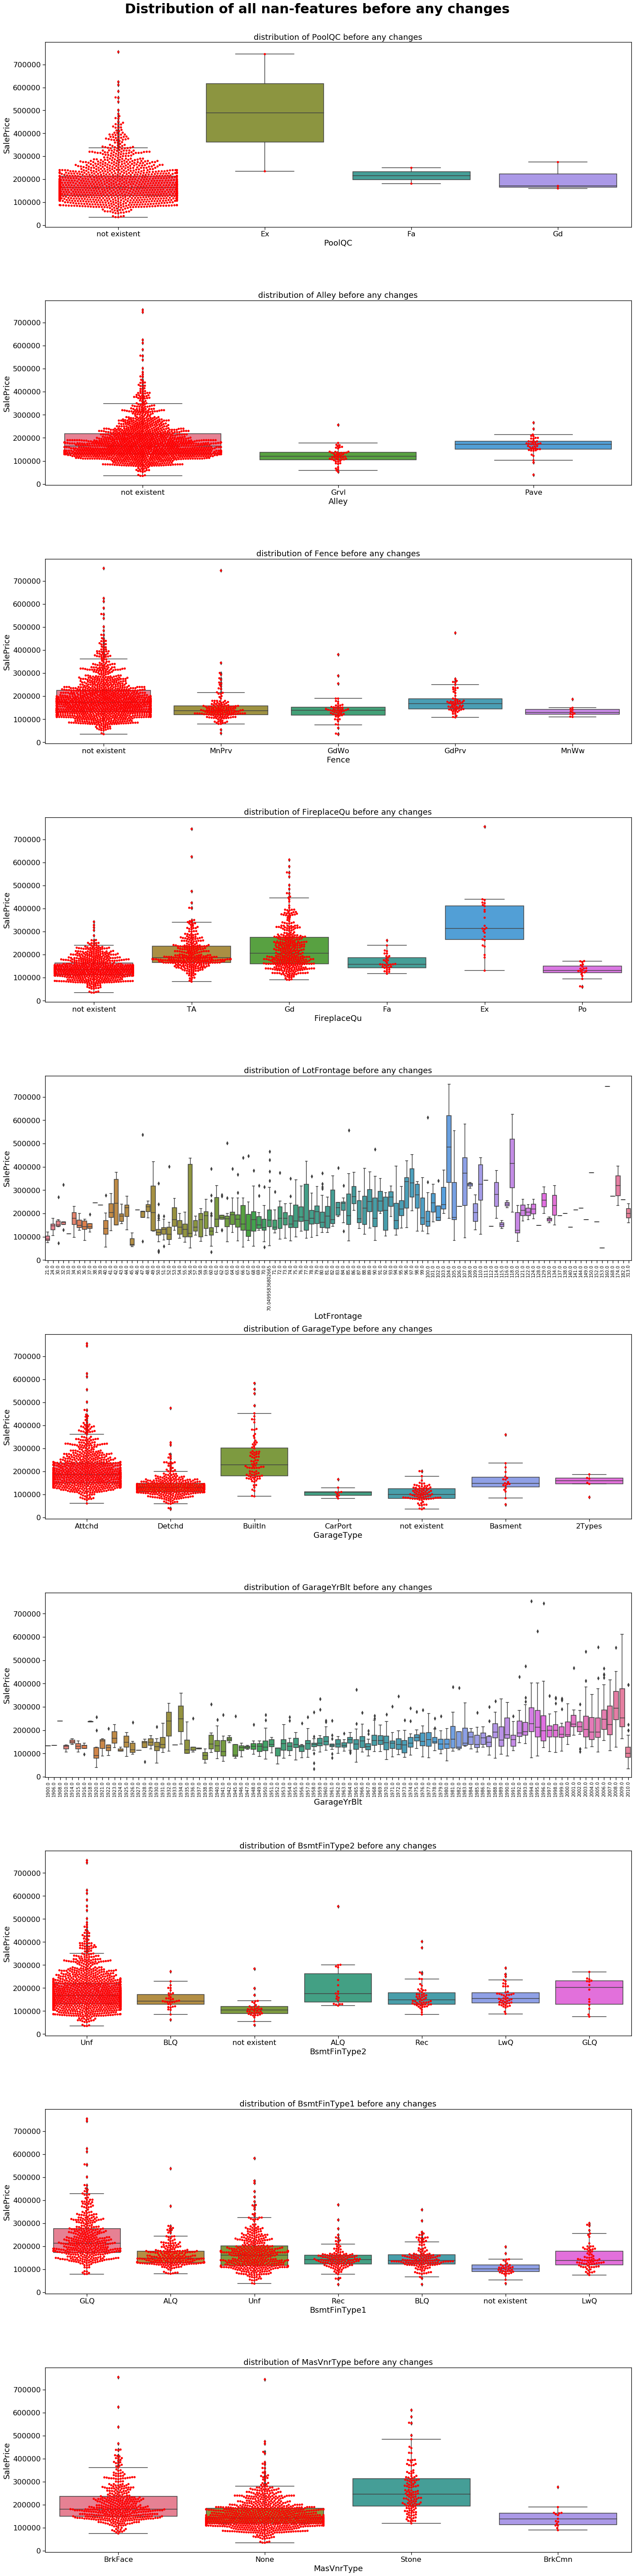

In [28]:
fig, ax = plt.subplots(10, 1, figsize=(20, 80))
fig.suptitle("Distribution of all nan-features before any changes",
             fontsize=30, fontweight='bold', y=1.01)
for var, subplot in zip(chosen_ten, ax.flatten()):
    if var == 'GarageYrBlt'or var =='LotFrontage':
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation=90, fontsize=10)
    g = sns.boxplot(x=var, y='SalePrice',data=df,palette='husl',ax=subplot)
    if var != 'GarageYrBlt' and var !='LotFrontage':
        g2 = sns.swarmplot(x=var, y='SalePrice', data=df, color="red",ax=subplot)

    g.set(title='distribution of {} before any changes'.format(var))
    fig.tight_layout()

#### What happened to the distribution? Explain the pros and cons of your decisions.

The distribution didn't changed  too much. We just added a visible meaning for `Nan` value and features got a new category `not existent`

## Outliers: 
### 1. Plot the distributions of features.

We won't plot the distribution now, we will plot it on one plot with changed data set down bellow

At first we will detect our columns with outliers which we will modifi in this part of the task

#### What are features that have values that can be considered as outliers? (Submit only relevant plots)


Almost all of the columns in main data set `df` contains outliers. 

Let's plot features from previous part with `imputation`, in this way we won't have to deal with missing values of them. 

So our features to remove outliers are:

In [29]:
outliers =['GarageYrBlt','LotFrontage']

### 2. Remove the outliers - by one of the methods that we discussed in the lecture. mention the business logic behind each decision you make.
 

First method we will use calls `z-score`:
    The `Z-score` is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
    
    Well, while calculating the `Z-score` we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the `Z-score` value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
We will use `Z-score` function defined in scipy library to detect the outliers.

In [30]:
df_z = df.copy()

num_train = df_z[outliers]
cat_train = df_z.drop(num_train,axis=1)
idx = np.all(stats.zscore(num_train) < 3, axis=1)
new_df_z = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

Second method we will try here calls `IQR score`:
        
        `Box plot` use the `IQR` method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data. 
       
       `The interquartile range (IQR)`, also called the `midspread` or `middle 50%`, or technically`H-spread`, is a measure of statistical dispersion, being equal to the difference between `75th`and `25th` percentiles, or between upper and lower quartiles, `IQR = Q3 − Q1.`

    In other words, the `IQR` is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
    It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

In our case we will take 25/75 quantiles: 

In [31]:
Q1 = num_train.quantile(0.25)
Q3 = num_train.quantile(0.75)
IQR = Q3 - Q1
idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
new_df_q = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

And now we can plot in a triple distribution plot the affect after using all methods and visualise the distribution before these changes

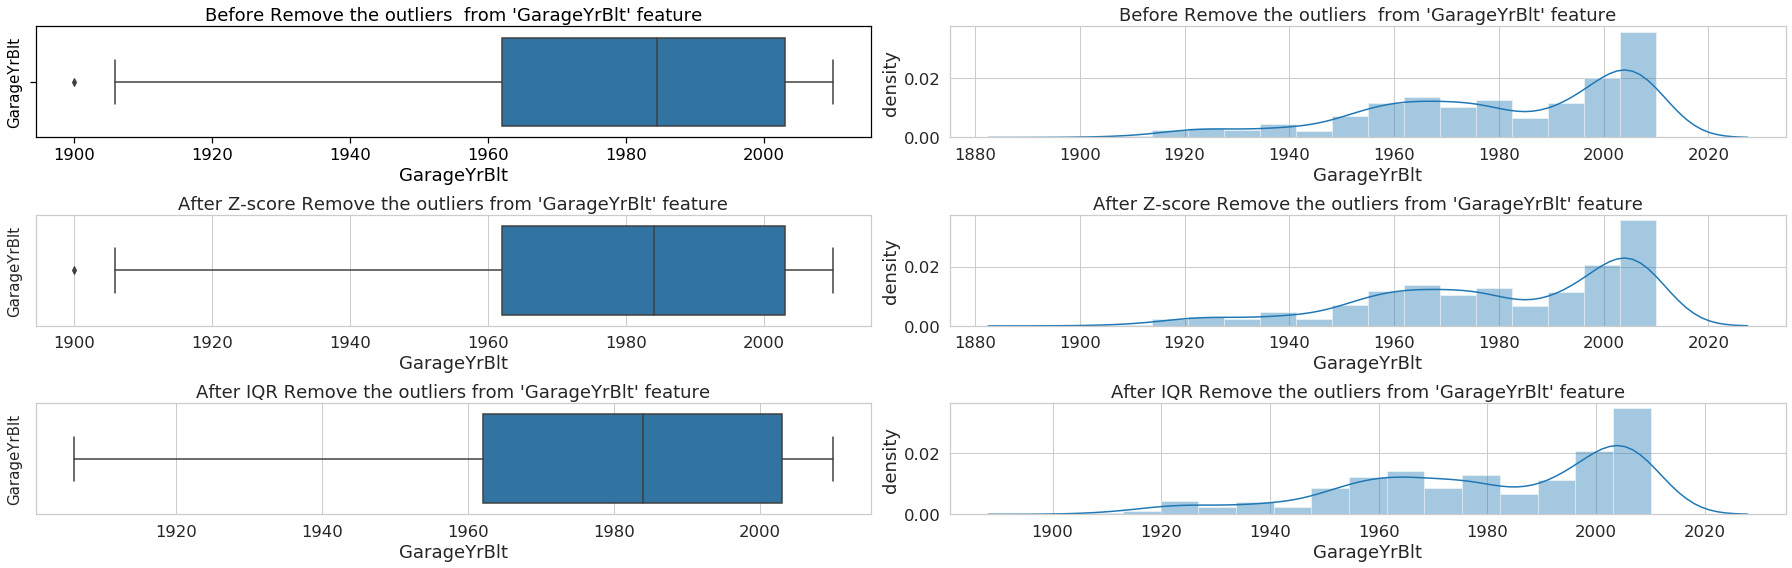

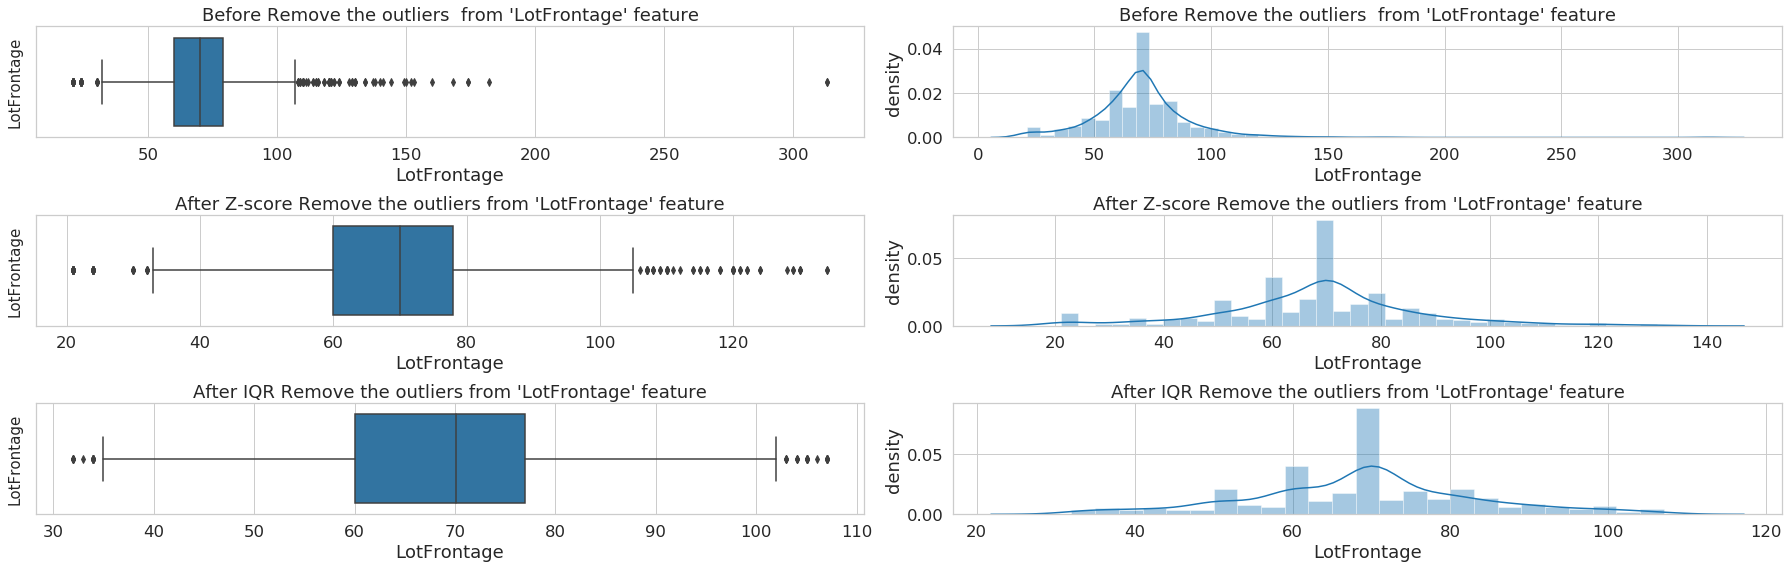

In [32]:
for var in outliers:
    plt.figure(figsize=(25,8))
    
    plt.subplot(3,2, 1)
    sns.set_style('whitegrid')
    fig = sns.boxplot(x=df[var])
    fig.set_title("Before Remove the outliers  from '{}' feature".format(var))
    fig.set_ylabel(var,fontsize=15)
    
    plt.subplot(3, 2, 2)
    fig = sns.distplot(df[var])
    fig.set_ylabel('density')
    fig.set_title("Before Remove the outliers  from '{}' feature".format(var))
    fig.set_xlabel(var)
   
    plt.subplot(3, 2, 3)
    sns.set_style('whitegrid')
    fig = sns.boxplot(x=new_df_z[var])
    fig.set_title("After Z-score Remove the outliers from '{}' feature".format(var))
    fig.set_ylabel(var,fontsize=15)
     
    plt.subplot(3, 2, 4)
    fig = sns.distplot(new_df_z[var])
    fig.set_title("After Z-score Remove the outliers from '{}' feature".format(var))
    fig.set_ylabel('density')
    fig.set_xlabel(var)
    
    plt.subplot(3, 2, 5)
    sns.set_style('whitegrid')
    fig = sns.boxplot(x=new_df_q[var])
    fig.set_title("After IQR Remove the outliers from '{}' feature".format(var))
    fig.set_ylabel(var,fontsize=15)
     
    plt.subplot(3, 2, 6)
    fig = sns.distplot(new_df_q[var])
    fig.set_title("After IQR Remove the outliers from '{}' feature".format(var))
    fig.set_ylabel('density')
    fig.set_xlabel(var)
    plt.tight_layout()
    plt.show()
    
    
# there 2 figures 2x6. To see it zoomed make double click on the interesting plot
#shft + mouse_scrol/'+' => scroll to the right on the zoomed plot

We see how the distribution was chenged:
    1. z-score has less affect than IQR-score
    2. In the feature `GarageYrBlt` z-score didn't  change the distribution but IQR-score moved the minimum and maximum values for 20 years (the point 1900 is dsappeared)
    3. The distribution of `LotFrontage` is changed also, but more proportional and more visible compearing with `GarageYrBlt`

### 3. What is the data shape now? 


In [33]:
print('The shape of data set\nat the begining is : {}\nafter z-score is : {}\nafter IQR-score is : {}'.format( df.shape,new_df_z.shape,new_df_q.shape))

The shape of data set
at the begining is : (1460, 81)
after z-score is : (1444, 81)
after IQR-score is : (1353, 81)


#### If you dropped rows - did you decrease the number of rows significantly?

In [34]:
print('The percentile of lost data after\nz-score is: {}%\nafter IQR-score is: {}%'.format(100*round(len(new_df_z)/len(df),2), 100*round(len(new_df_q)/len(df), 2)))

The percentile of lost data after
z-score is: 99.0%
after IQR-score is: 93.0%


We didn't decrease the number of rows significantly.

1% and 3% of losing data is acceptable norm( statistics say we able to lose up to 5% of incoming data and it woun't affect our model)

Let's check again for nan our modified columns

In [35]:
df_null = assess_NA(new_df_z)
df_null

,Number of NA,Percent NA
MiscFeature,1390,96.26
GarageFinish,79,5.47
GarageQual,79,5.47
GarageCond,79,5.47
BsmtExposure,38,2.63
BsmtCond,37,2.56
BsmtQual,37,2.56
MasVnrArea,8,0.55
Electrical,1,0.07


 No `LotFrontage` and `GarageYrBlt` witn Nan value

In [36]:
df_null = assess_NA(new_df_z)
df_null

,Number of NA,Percent NA
MiscFeature,1390,96.26
GarageFinish,79,5.47
GarageQual,79,5.47
GarageCond,79,5.47
BsmtExposure,38,2.63
BsmtCond,37,2.56
BsmtQual,37,2.56
MasVnrArea,8,0.55
Electrical,1,0.07


 and also here No `LotFrontage` and `GarageYrBlt` witn Nan value

<div class="alert alert-info"><b>Note:</b> Always document all of the processes you are doing to your data, in a jupyter notebook. Also document the DataFrame shape after every operation, and explain the thought behind each step you took. You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable</div>